In [1]:
# must be specified to be able to use methods of package
import sys
sys.path.append('../src') 
# import packages
import pandas as pd
from political_ads.Preprocessor import *
from political_ads.helper import *

In [2]:
#Code to read from our full dataset:
preprocess = Preprocessor()
df = preprocess.file_to_df('/home/gustavgyrst/Desktop/Research Project/political-ad-api/data/all_politicians_aggregated.txt')
df.head(3)

,ad_creation_time,ad_creative_body,spend,impressions,delivery_by_region,demographic_distribution,page_id,page_name,bylines,id,spend_lo,spend_hi,impressions_lo,impressions_hi
0,2019-05-20,CONFIRMATION NEEDED: Do you want to save Socia...,149.5,3499.5,"[{'percentage': '0.002362', 'region': 'Mississ...","[{'percentage': '0.000476', 'age': '35-44', 'g...",283932788322459,Pete Aguilar for Congress,Pete Aguilar for Congress,186686335555403,100,199,3000,3999
1,2019-05-20,CALLING ALL DEMOCRATS! Congressman Pete Aguila...,49.5,499.5,"[{'percentage': '0.008929', 'region': 'Marylan...","[{'percentage': '0.008929', 'age': '25-34', 'g...",283932788322459,Pete Aguilar for Congress,Pete Aguilar for Congress,291841175036406,0,99,0,999
2,2019-05-20,CALLING ALL DEMOCRATS! Congressman Pete Aguila...,49.5,499.5,"[{'percentage': '0.009346', 'region': 'New Mex...","[{'percentage': '0.476636', 'age': '65+', 'gen...",283932788322459,Pete Aguilar for Congress,Pete Aguilar for Congress,297843221168257,0,99,0,999


In [3]:
#General stats
print("There are", len(df[df.impressions_lo == 1000000]), "ads with spending of $1,000,000 or above in the data-set")
print(len(df), "ads in total")



There are 605 ads with spending of $1,000,000 or above in the data-set
602663 ads in total


# 1. Demographic Distribution


In [4]:
#lst of failed attempts
lst_of_failed = []
#The list that will be returned
lst  = []

#Get age distribution
def get_age_distribution(row):
    #The list that will be returned
    lst  = []

    #The map of age_dist
    age_dist = {'13-17': 0.0, '18-24': 0.0, '25-34':0.0, '35-44':0.0, '45-54':0.0, '55-64':0.0, '65+':0.0, 'Unknown': 0.0} #important that Unknown is with capital U
    
    for item in row.demographic_distribution:
        try:
            age = item['age']
            percentage = float(item['percentage'])
            age_dist[age] = age_dist.get(age) + percentage
            
        except:
            lst_of_failed.append(row[['page_name', 'demographic_distribution']])
            pass
            
    
    for key, value in age_dist.items():
        lst.append(value*row['impressions_hi']) # CHANGED SOMETHING HERE NOT TESTED

    return pd.Series(lst)

In [5]:
NaNs = df[df['demographic_distribution'].isna() == True]
print("Amount of NaNs values in the demographic_distribution field:", len(NaNs))
NaNs.head(1)


Amount of NaNs values in the demographic_distribution field: 139144


,ad_creation_time,ad_creative_body,spend,impressions,delivery_by_region,demographic_distribution,page_id,page_name,bylines,id,spend_lo,spend_hi,impressions_lo,impressions_hi
16,2019-05-06,President Trump’s Administration is working to...,49.5,499.5,NaN,NaN,283932788322459,Pete Aguilar for Congress,Pete Aguilar for Congress,289746411935769,0,99,0,999


In [6]:
demographics = df[['page_name', 'demographic_distribution', 'impressions_hi']].reset_index().drop(columns='index')
print(len(demographics))
demographics = demographics.dropna()
print("Are there nans?:", demographics.isna().any())

#Creating the Columns
age_dist_lst = ['13-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65+', 'unknown']
for i in age_dist_lst:
     demographics[i] = 0.0

print(len(demographics))

demographics.head(1)

602663
Are there nans?: page_name                   False
demographic_distribution    False
impressions_hi              False
dtype: bool
463519


,page_name,demographic_distribution,impressions_hi,13-17,18-24,25-34,35-44,45-54,55-64,65+,unknown
0,Pete Aguilar for Congress,"[{'percentage': '0.000476', 'age': '35-44', 'g...",3999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
demographics[['13-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65+', 'unknown']] = demographics.apply(get_age_distribution, axis=1)

In [8]:
from matplotlib import pyplot as plt

In [9]:
demo_view = demographics.groupby('page_name').sum()
#demo_view = demo_view.drop(columns='demographic_distribution')
demo_view = demo_view.drop(columns='impressions_hi')


demo_view

,13-17,18-24,25-34,35-44,45-54,55-64,65+,unknown
page_name,,,,,,,,
A. Donald McEachin,12.999935,1.987147e+05,3.988703e+05,2.118494e+05,1.362902e+05,9.105370e+04,5.818320e+04,0.00000
Abigail Spanberger,70.453216,3.972810e+06,6.951378e+06,4.820296e+06,3.564626e+06,3.149299e+06,3.341212e+06,0.00000
Adam Kinzinger,2.659335,8.424296e+05,1.207032e+06,1.166298e+06,1.300354e+06,1.475320e+06,1.371468e+06,0.00000
Adam Schiff,26.803657,8.751732e+05,3.364393e+06,5.971962e+06,1.167246e+07,2.373207e+07,3.943303e+07,0.00000
Adam Smith for Congress,0.000000,4.268917e+05,7.101623e+05,4.539755e+05,3.126374e+05,2.687389e+05,4.084751e+05,0.00000
...,...,...,...,...,...,...,...,...
Yarmuth for Congress,21.128316,3.323943e+04,8.126106e+04,6.225779e+04,3.965351e+04,5.640109e+04,5.114610e+04,0.00000
Young Kim,25.354315,1.070108e+06,3.949871e+06,4.049847e+06,5.406011e+06,8.461406e+06,1.065555e+07,6.07942
Yvette D. Clarke,0.000000,7.919466e+04,2.434399e+05,1.871632e+05,1.259955e+05,8.883845e+04,6.535229e+04,0.00000


559

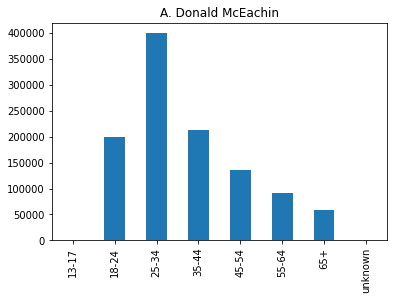

In [130]:
demo_view.iloc[0].plot(kind='bar', y='Impressions', x='age', title=demo_view.index[0])

len(demo_view)
#https://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot


In [11]:
#The one that didn't make it
lst_of_failed

[page_name                        Elizabeth Warren
 demographic_distribution    [{'percentage': '1'}]
 Name: 491726, dtype: object,
 page_name                        Elizabeth Warren
 demographic_distribution    [{'percentage': '1'}]
 Name: 491727, dtype: object,
 page_name                        Elizabeth Warren
 demographic_distribution    [{'percentage': '1'}]
 Name: 491736, dtype: object,
 page_name                        Elizabeth Warren
 demographic_distribution    [{'percentage': '1'}]
 Name: 491748, dtype: object,
 page_name                        Elizabeth Warren
 demographic_distribution    [{'percentage': '1'}]
 Name: 491770, dtype: object,
 page_name                        Elizabeth Warren
 demographic_distribution    [{'percentage': '1'}]
 Name: 491776, dtype: object]

# Age Distribtuion

In [30]:
#Random sum check
sum = 0
for i in df.demographic_distribution[0]:
    sum += float(i.get('percentage'))
print("The sum of all the percentages given in the dictionary of diff values (yep they don't sum to 100", sum)
#So... they don't even sum up to a hundred



0.9999980000000002


In [96]:
list_of_failed_g = []

def get_gender_distribution(row):
    
    #initializing percentages
    percentage_male = 0.0
    percentage_female = 0.0
    percentage_unknown = 0.0

    try:
        for item in row.demographic_distribution:
            if item['gender'] == 'male':
                percentage_male += float(item['percentage'])
            elif item['gender'] == 'female':
                percentage_female += float(item['percentage'])
            elif item['gender'] == 'Unknown':
                percentage_unknown += float(item['percentage'])
    except:
        list_of_failed_g.append(lst)
    
    avg_imp = float(row['avg_impressions'])
    lst_all_genders = [percentage_male, percentage_female, percentage_unknown]
    for i in range(3):
        lst_all_genders[i] = lst_all_genders[i]*avg_imp
    
    #Getting the avg impression to get the weight of the gender distribution
    return pd.Series(lst_all_genders)


In [97]:
#Making a Df representing the gender distribution:
gender = df[['page_name','demographic_distribution', 'impressions_lo', 'impressions_hi']]

#Dropping NaNs
gender = gender.dropna()
gender['avg_impressions'] = gender.apply(lambda x: ((x['impressions_lo'] + x['impressions_hi']) / 2), axis=1)



In [98]:
gender.head(1)


,page_name,demographic_distribution,impressions_lo,impressions_hi,avg_impressions
0,Pete Aguilar for Congress,"[{'percentage': '0.000476', 'age': '35-44', 'g...",3000,3999,3499.5


In [99]:
gender[['male', 'female', 'unknown']] = gender.apply(get_gender_distribution, axis=1)


In [114]:
gender_cleaned = gender.drop(['impressions_hi', 'impressions_lo', 'demographic_distribution', 'avg_impressions' ], axis=1)
gender_cleaned = gender_cleaned.groupby('page_name').sum()

559

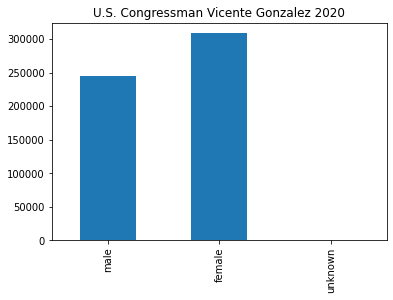

In [135]:
index_of_pol = 536
gender_cleaned.iloc[index_of_pol].plot(kind='bar', y='impressions', x='gender', title=demo_view.index[index_of_pol])

len(gender_cleaned)



In [137]:
#Finding -- We have two campaign accounts for vincente gonzales (2020 and 2022)
# on index 536 and 537...

df_all_ad_pages = pd.read_csv('/home/gustavgyrst/Desktop/Research Project/political-ad-api/data/FacebookAdLibraryReport_2021-10-15_US_lifelong_advertisers.csv')
df_all_ad_pages[df_all_ad_pages['Page Name'].str.contains('U.S. Congressman Vicente Gonzalez 2020', na=False)]
#No result....

/home/gustavgyrst/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Page ID,Page Name,Disclaimer,Amount Spent (USD),Number of Ads in Library
13616,206690159663661,U.S. Congressman Vicente Gonzalez 2022,VICENTE GONZALEZ FOR CONGRESS,15688,292
30729,206690159663661,U.S. Congressman Vicente Gonzalez 2022,Vicente Gonzalez for Congress Committee,4030,173
168447,206690159663661,U.S. Congressman Vicente Gonzalez 2022,Vicente Gonzalez for U.S. Congress Committee,≤100,9
223284,206690159663661,U.S. Congressman Vicente Gonzalez 2022,These ads ran without a disclaimer,≤100,6


# 2. Geographic Distribution

In [ ]:
#https://datascience.stackexchange.com/questions/9616/how-to-create-us-state-choropleth-map
#Convert the demographic data into a heat-map
